In [5]:
from qsofitmore import QSOFitNew
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.table import Table
from astropy.io import fits
import os 

In [19]:
def fit_spectra(data_path, z, ra, dec, 
                output_path:str='/Users/yaroslav/Documents/2. work/Research/GitHub/AGN-UMAP/code/monthly/nov2023/wk1/qsofitmore/output/'): 
    
    name = data_path.split('/')[-1].split('.')[0]

    data = fits.open(data_path)
    wave = 10 ** data[1].data['loglam']  # OBS wavelength [A]
    flux = data[1].data['flux']  # OBS flux [erg/s/cm^2/A]
    err = np.nan_to_num(1 / np.sqrt(data[1].data['ivar']), nan=0.0)  # 1 sigma error
    z = data[2].data['z'][0]  # Redshift

    q = QSOFitNew(lam=wave, flux=flux, err=err, 
                z=z, ra=ra, dec=dec,
                name=name, is_sdss=True, path=output_path)

    q.setmapname("sfd")

    fit = q.Fit(name = name, deredden = True, wave_range = None, wave_mask =None, 
            decomposition_host = True, Mi = None, npca_gal = 5, npca_qso = 20,
            Fe_uv_op = True, poly = True, BC = False, MC = True, n_trails = 20, 
            linefit = True, tie_lambda = True, tie_width = True, tie_flux_1 = True, tie_flux_2 = True,
            save_result = True, plot_fig = True, save_fig = True, 
            plot_line_name = True, plot_legend = True) # The broad_fwhm parameter can be adjusted depending on your definition (default is 1200 km s
    
    return q, fit, wave, flux

The dust map is sfd.
redshift larger than 1.16 is not allowed for host decomposion!
['MgII_na']


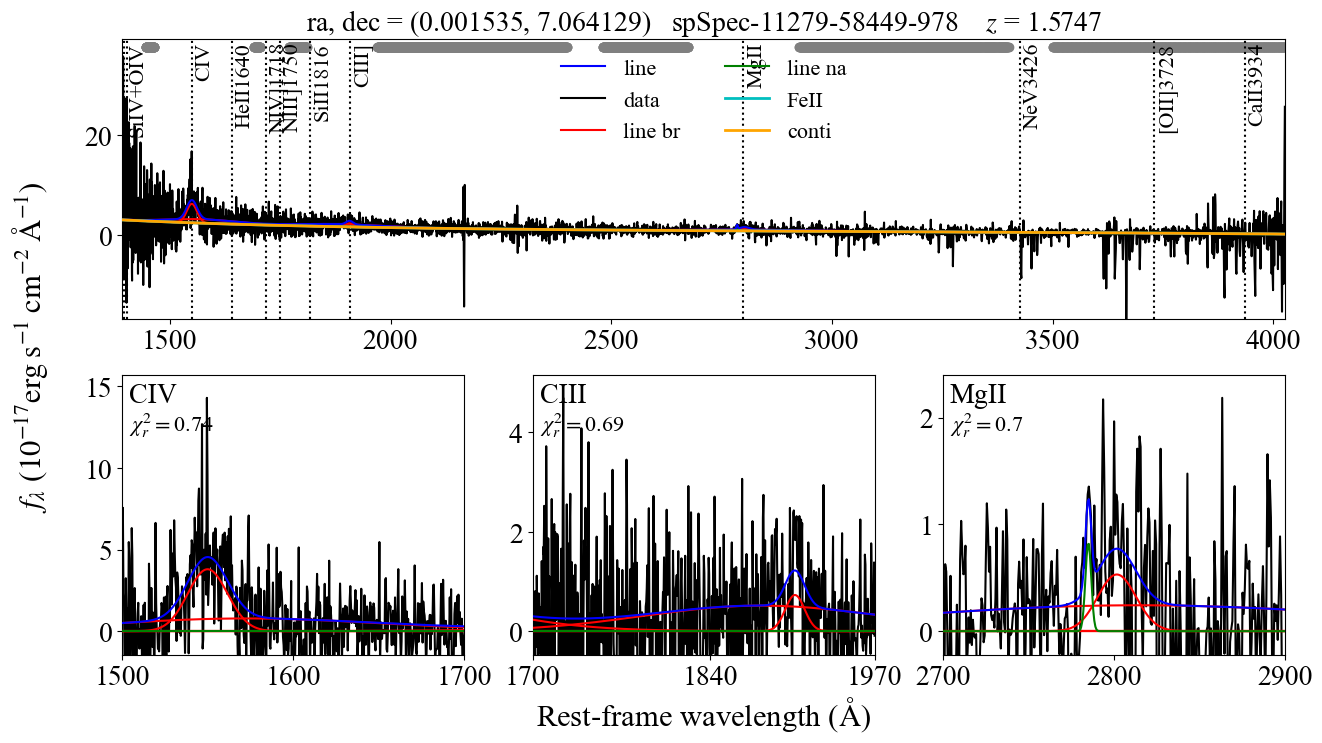

In [20]:
fits_path = f'/Users/yaroslav/Documents/2. work/Research/GitHub/AGN-UMAP/code/monthly/oct2023/wk4/download-data/data/spSpec-11279-58449-978.fits'
q, fit, wave, flux = fit_spectra(fits_path, z=1.5742275, ra=0.0015353689, dec=7.0641293)

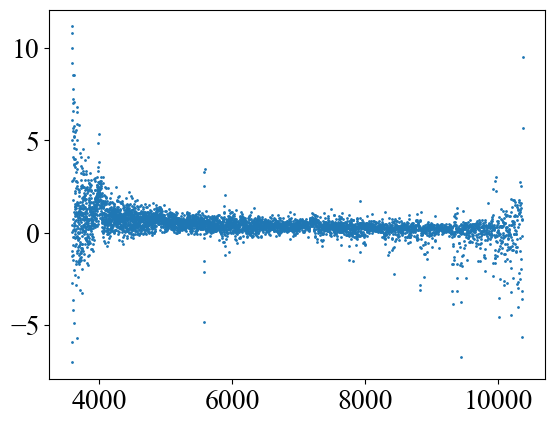

In [22]:
plt.scatter(wave, flux, s=1)

In [65]:
variables = vars(q)
shapes = [np.shape(np.array(i)) for i in variables.values()]
names = np.array(variables.keys())
for i, j in zip(variables, shapes): 
    print(i, j)
    if j > (4000, ):
        print(j)

sn_obs (4612,)
(4612,)
z ()
and_mask ()
or_mask ()
ra ()
dec ()
name ()
plateid ()
mjd ()
fiberid ()
path ()
is_sdss ()
mapname ()
mask_compname ()
broken_pl ()
wave_range ()
wave_mask ()
BC03 ()
Mi ()
npca_gal ()
npca_qso ()
initial_guess ()
Fe_uv_op ()
Fe_verner09 ()
Fe_flux_range ()
poly ()
BC ()
rej_abs ()
MC ()
n_trails ()
tie_lambda ()
tie_width ()
tie_flux_1 ()
tie_flux_2 ()
plot_line_name ()
plot_legend ()
save_fig ()
sdss_name ()
lam (4606,)
(4606,)
flux (4606,)
(4606,)
err (4606,)
(4606,)
wave (4606,)
(4606,)
SN_ratio_conti ()
wave_prereduced (4606,)
(4606,)
flux_prereduced (4606,)
(4606,)
err_prereduced (4606,)
(4606,)
decomposed ()
fe_uv (3418, 2)
fe_op (2000, 2)
fe_verner (1059, 2)
df_balmer_series (45, 3)
conti_result (42,)
conti_result_type (42,)
conti_result_name (42,)
conti_fit ()
tmp_all (4606,)
(4606,)
f_conti_model (4606,)
(4606,)
f_bc_model (4606,)
(4606,)
f_fe_uv_model (4606,)
(4606,)
f_fe_op_model (4606,)
(4606,)
f_fe_verner_model (4606,)
(4606,)
f_pl_model (4606

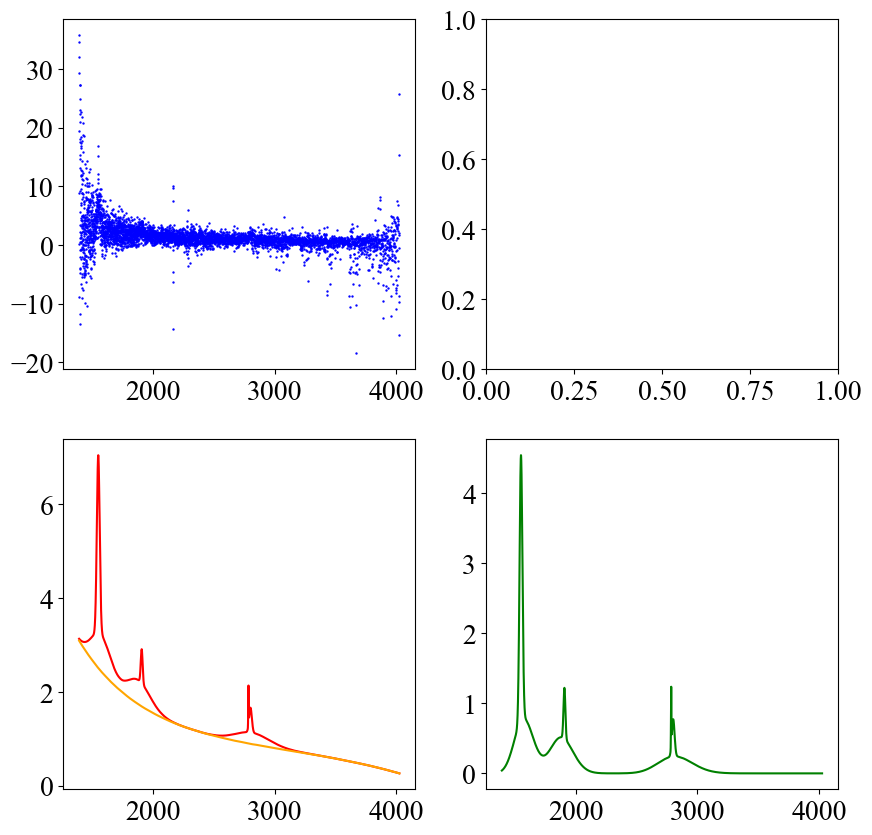

In [96]:
#plt.scatter(q.wave_prereduced, q.flux_prereduced, s=1)
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0,0].scatter(q.wave_prereduced, q.flux_prereduced, s=0.5, color='blue')
axs[1,0].plot(q.wave_prereduced, q.f_conti_model+q.lines_total, color='red')
axs[1,0].plot(q.wave_prereduced, q.f_conti_model, color='orange')
axs[1,1].plot(q.wave_prereduced, q.lines_total, color='green')